## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.801668 -0.316026  1.124319  1.500736 -1.560010  0.174032
1 -0.432958  1.363475  1.587577 -1.503700 -0.387532  0.406539
2  1.047284  1.441784  0.428140 -1.313500 -0.522296 -0.967393
3 -0.094072 -0.465842 -0.432521 -0.637142  0.045664 -0.647997
4  0.684507 -1.527271  1.069265  0.444078  0.941344 -0.330145


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9353751	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9268062	total: 70ms	remaining: 34.9s
2:	learn: 0.9183823	total: 70.6ms	remaining: 23.5s
3:	learn: 0.9094991	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9017854	total: 71.6ms	remaining: 14.3s
5:	learn: 0.8938704	total: 72.1ms	remaining: 11.9s
6:	learn: 0.8848077	total: 72.6ms	remaining: 10.3s
7:	learn: 0.8776543	total: 73ms	remaining: 9.06s
8:	learn: 0.8700231	total: 73.7ms	remaining: 8.12s
9:	learn: 0.8628388	total: 74.3ms	remaining: 7.36s
10:	learn: 0.8546639	total: 74.7ms	remaining: 6.72s
11:	learn: 0.8465915	total: 75.2ms	remaining: 6.19s
12:	learn: 0.8382976	total: 75.8ms	remaining: 5.75s
13:	learn: 0.8297092	total: 76.3ms	remaining: 5.37s
14:	learn: 0.8239722	total: 76.7ms	remaining: 5.04s
15:	learn: 0.8171663	total: 77.2ms	remaining: 4.75s
16:	learn: 0.8111429	total: 77.6ms	remaining: 4.49s
17:	learn: 0.8033688	total: 78.2ms	remaining: 4.26s
18:	learn: 0.7969440	total: 78.7ms	remaining: 4.

85:	learn: 0.4620455	total: 110ms	remaining: 1.17s
86:	learn: 0.4587035	total: 110ms	remaining: 1.16s
87:	learn: 0.4554517	total: 111ms	remaining: 1.15s
88:	learn: 0.4520911	total: 111ms	remaining: 1.14s
89:	learn: 0.4487083	total: 111ms	remaining: 1.13s
90:	learn: 0.4452147	total: 112ms	remaining: 1.12s
91:	learn: 0.4416122	total: 112ms	remaining: 1.11s
92:	learn: 0.4380289	total: 113ms	remaining: 1.1s
93:	learn: 0.4352291	total: 113ms	remaining: 1.09s
94:	learn: 0.4313650	total: 114ms	remaining: 1.09s
95:	learn: 0.4284291	total: 115ms	remaining: 1.08s
96:	learn: 0.4253312	total: 115ms	remaining: 1.07s
97:	learn: 0.4222929	total: 116ms	remaining: 1.06s
98:	learn: 0.4190461	total: 116ms	remaining: 1.06s
99:	learn: 0.4155422	total: 117ms	remaining: 1.05s
100:	learn: 0.4126196	total: 117ms	remaining: 1.04s
101:	learn: 0.4096986	total: 117ms	remaining: 1.03s
102:	learn: 0.4061084	total: 118ms	remaining: 1.03s
103:	learn: 0.4027738	total: 118ms	remaining: 1.02s
104:	learn: 0.3998402	total:

246:	learn: 0.1464558	total: 188ms	remaining: 572ms
247:	learn: 0.1455017	total: 188ms	remaining: 571ms
248:	learn: 0.1442680	total: 189ms	remaining: 569ms
249:	learn: 0.1432652	total: 189ms	remaining: 567ms
250:	learn: 0.1423347	total: 189ms	remaining: 565ms
251:	learn: 0.1413518	total: 190ms	remaining: 563ms
252:	learn: 0.1404954	total: 190ms	remaining: 562ms
253:	learn: 0.1395416	total: 191ms	remaining: 560ms
254:	learn: 0.1387722	total: 191ms	remaining: 558ms
255:	learn: 0.1377521	total: 191ms	remaining: 556ms
256:	learn: 0.1367973	total: 192ms	remaining: 555ms
257:	learn: 0.1358310	total: 192ms	remaining: 553ms
258:	learn: 0.1347799	total: 193ms	remaining: 551ms
259:	learn: 0.1338260	total: 193ms	remaining: 550ms
260:	learn: 0.1330664	total: 193ms	remaining: 548ms
261:	learn: 0.1321555	total: 194ms	remaining: 546ms
262:	learn: 0.1313151	total: 194ms	remaining: 545ms
263:	learn: 0.1304864	total: 195ms	remaining: 543ms
264:	learn: 0.1294175	total: 195ms	remaining: 541ms
265:	learn: 

471:	learn: 0.0387430	total: 293ms	remaining: 328ms
472:	learn: 0.0386196	total: 293ms	remaining: 327ms
473:	learn: 0.0384419	total: 294ms	remaining: 326ms
474:	learn: 0.0383214	total: 294ms	remaining: 325ms
475:	learn: 0.0380845	total: 295ms	remaining: 324ms
476:	learn: 0.0379841	total: 295ms	remaining: 324ms
477:	learn: 0.0378674	total: 296ms	remaining: 323ms
478:	learn: 0.0376018	total: 296ms	remaining: 322ms
479:	learn: 0.0373739	total: 297ms	remaining: 321ms
480:	learn: 0.0372611	total: 297ms	remaining: 320ms
481:	learn: 0.0369853	total: 298ms	remaining: 321ms
482:	learn: 0.0368899	total: 299ms	remaining: 320ms
483:	learn: 0.0366699	total: 299ms	remaining: 319ms
484:	learn: 0.0365699	total: 299ms	remaining: 318ms
485:	learn: 0.0364631	total: 300ms	remaining: 317ms
486:	learn: 0.0363581	total: 300ms	remaining: 316ms
487:	learn: 0.0360912	total: 301ms	remaining: 316ms
488:	learn: 0.0360008	total: 301ms	remaining: 315ms
489:	learn: 0.0358984	total: 302ms	remaining: 314ms
490:	learn: 

633:	learn: 0.0202535	total: 371ms	remaining: 214ms
634:	learn: 0.0201724	total: 372ms	remaining: 214ms
635:	learn: 0.0200966	total: 372ms	remaining: 213ms
636:	learn: 0.0200430	total: 373ms	remaining: 212ms
637:	learn: 0.0199102	total: 373ms	remaining: 212ms
638:	learn: 0.0198280	total: 373ms	remaining: 211ms
639:	learn: 0.0197248	total: 374ms	remaining: 210ms
640:	learn: 0.0196237	total: 374ms	remaining: 210ms
641:	learn: 0.0195245	total: 375ms	remaining: 209ms
642:	learn: 0.0194894	total: 375ms	remaining: 208ms
643:	learn: 0.0194547	total: 376ms	remaining: 208ms
644:	learn: 0.0194206	total: 376ms	remaining: 207ms
645:	learn: 0.0192934	total: 377ms	remaining: 206ms
646:	learn: 0.0191858	total: 377ms	remaining: 206ms
647:	learn: 0.0190900	total: 378ms	remaining: 205ms
648:	learn: 0.0190122	total: 378ms	remaining: 205ms
649:	learn: 0.0189080	total: 379ms	remaining: 204ms
650:	learn: 0.0188755	total: 379ms	remaining: 203ms
651:	learn: 0.0188435	total: 380ms	remaining: 203ms
652:	learn: 

851:	learn: 0.0094337	total: 477ms	remaining: 82.9ms
852:	learn: 0.0094138	total: 478ms	remaining: 82.3ms
853:	learn: 0.0093985	total: 478ms	remaining: 81.8ms
854:	learn: 0.0093747	total: 479ms	remaining: 81.2ms
855:	learn: 0.0093509	total: 479ms	remaining: 80.7ms
856:	learn: 0.0093316	total: 480ms	remaining: 80.1ms
857:	learn: 0.0093041	total: 480ms	remaining: 79.5ms
858:	learn: 0.0092764	total: 481ms	remaining: 78.9ms
859:	learn: 0.0092532	total: 481ms	remaining: 78.3ms
860:	learn: 0.0092270	total: 482ms	remaining: 77.7ms
861:	learn: 0.0092169	total: 482ms	remaining: 77.2ms
862:	learn: 0.0092022	total: 483ms	remaining: 76.6ms
863:	learn: 0.0091863	total: 483ms	remaining: 76ms
864:	learn: 0.0091707	total: 484ms	remaining: 75.5ms
865:	learn: 0.0091202	total: 484ms	remaining: 74.9ms
866:	learn: 0.0090705	total: 485ms	remaining: 74.3ms
867:	learn: 0.0090563	total: 485ms	remaining: 73.7ms
868:	learn: 0.0090336	total: 486ms	remaining: 73.2ms
869:	learn: 0.0089849	total: 486ms	remaining: 72

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

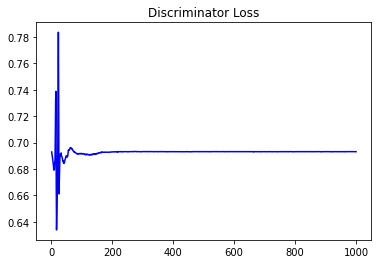

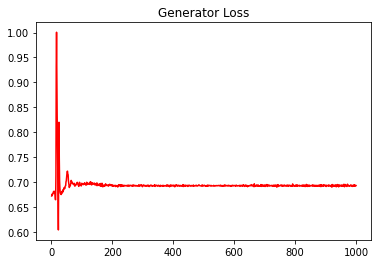

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3696463404364735


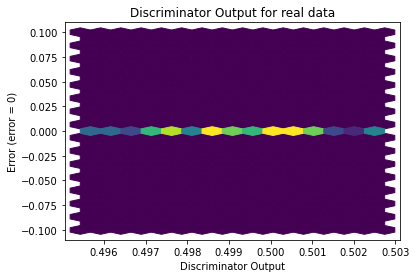

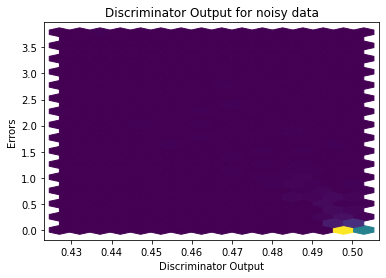

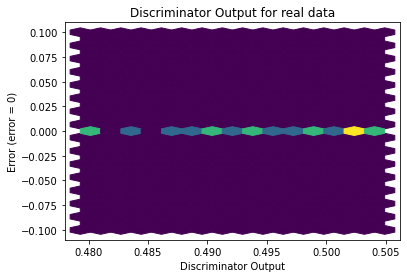

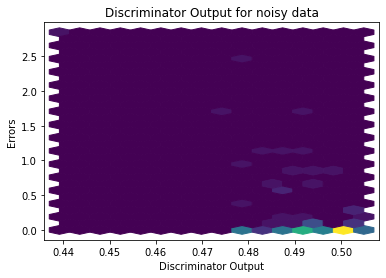

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


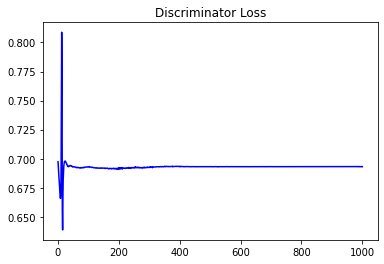

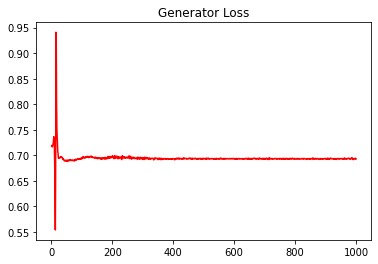

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3424784599810737


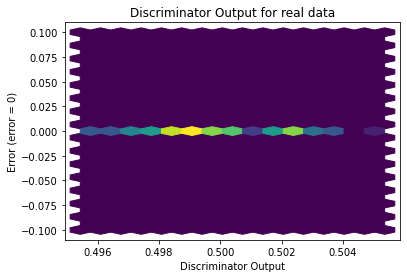

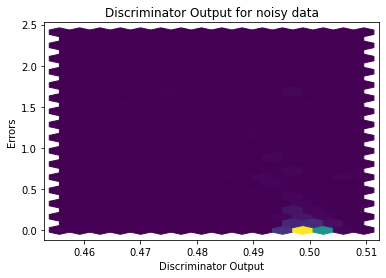

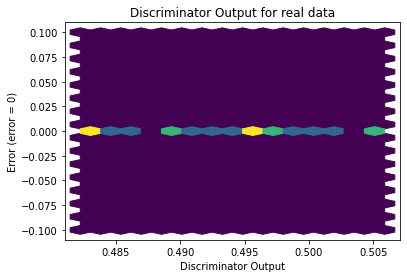

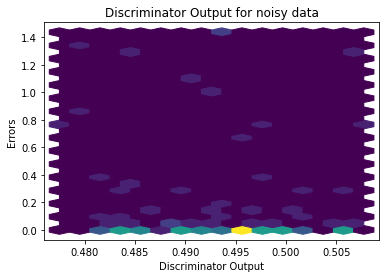

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0655]], requires_grad=True)
